Homework 1 — (15 points)
======
### What to hand in
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

### How to hand it in
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw1.zip. 
1. Submit this .zip file via Canvas

## Run this code block 1st, to import likely needed packages

In [1]:
# This line imports most packages you'll need. You may need to import others (eg random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math
from IPython.display import Audio

# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

D:\Softwares\Profession\Development\Miniconda2\envs\eecs352\lib\site-packages\librosa\core\audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


## Questions

#### 1. (one point) Go out on the web and read about the early history of audio recording. Thomas Edison, Alexandar Graham Bell,  Édouard-Léon Scott de Martinville and Valdemar Poulsen are all big names in the history of audio recording. Give one paragraph on what each of these people contributed to audio recording.

Edison invented phonograph, which was the first to be able to reproduce the recorded sound. Edison also invented and developed the carbon microphone used in all telephones along with the Bell receiver until the 1980s.

Bell was one of the primary inventors of the telephone, actually, he was credited with patenting the first practical telephone.

Édouard-Léon Scott de Martinville invented the earliest known sound recording device, the phonautograph, which could transcribe sound waves.

Valdemar Poulsen also made significant contributions to early radio technology, including developing a magnetic wire recorder and the first continuous wave radio transmitter, the Poulsen arc transmitter 

#### 2. (one point)  The sample rate of telephone audio (8 kHz) and CD quality audio (44.1 kHz) are very different. Explain what effect this difference in sample rate has on the ability of a recorder to reproduce sound and why the sample rate of CD audio is what it is. 

The quality of a digital audio recording depends heavily on two factors: the sample rate and the sample format or bit depth. Increasing sample rate increases the quality of the recording, but also increases the size of audio file.
Higher sample rates allow higher audio frequencies to be represented. Provided that the sample rate is more than double the highest audio frequency present, the waveform can be reconstructed exactly from the digital samples. Frequencies that are more than half the sample rate cannot be correctly represented in digital samples. "Half the sample rate" therefore represents an upper limit called the Nyquist frequency, and the analog waveform must be entirely below this limit to be correctly represented digitally. Analog frequencies at this limit or above cannot be correctly represented by the digital samples and would cause a kind of distortion.

Human speech is intelligible even if frequencies above 4000 Hz are eliminated; in fact telephones only transmit frequencies between 200 Hz and 4000 Hz. Therefore a common sample rate for audio recordings is 8000 H.

Because the hearing range of human ears is roughly 20 Hz to 20,000 Hz, and via the Nyquist–Shannon sampling theorem the sampling frequency must be greater than twice the maximum frequency one wishes to reproduce, the sampling rate therefore had to be greater than 40 kHz.
In addition to this, signals must be low-pass filtered before sampling, otherwise aliasing occurs, and, while an ideal low-pass filter would perfectly pass frequencies below 20 kHz (without attenuating them) and perfectly cut off frequencies above 20 kHz. The 44.1 kHz sampling frequency allows for a 2.05 kHz transition band. So 44.1kHz is chosen as sample rate of CD audio for a practical and economical concerning.

#### Sample rate isn't the only difference between CD and telephone audio. Express in dB the difference in dynamic range between 8 bit audio (telephone quality) and 16 bit audio (CD quality).  How many bits would one need to exceed the dynamic range of human hearing? Show you work.

Your answer goes here

In [2]:
# your code to give the answer goes here
dynamic_range = 120

bits = 1
while 20 * np.log10(2 ** bits) < dynamic_range:
    bits += 1

print "To exceed the dynamic range of human hearing, %d bits are needed" %bits


To exceed the dynamic range of human hearing, 20 bits are needed


#### 3. (one point) Make a function to generate sinewaves and a function  to plot an audio signal. Label the figure's axes appropriately.

In [3]:
def make_sinewave(f, t, sr):
    """    
    Parameters
    ----------
    f:  float
        Frequency of sine wave
    t:  float
        Duration in seconds
    sr: int
        Sample rate
    
    Returns
    -------
    np.ndarray 
        Array of floats containing the signal
    """
    span = np.arange(0, t*sr)/sr
    return np.sin(2 * np.pi * f * span)

def plot_audio(x, sr, figsize=(16,4)):
    """
    A simple audio plotting function
    
    Parameters
    ----------
    x: np.ndarray
        Audio signal to plot
    sr: int
        Sample rate
    figsize: tuple
        A duple representing the figure size (xdim,ydim)
    """
    length = float(x.shape[0]) / sr
    t = np.linspace(0,length,x.shape[0])
    plt.figure(figsize=figsize)
    plt.plot(t, x)
    plt.ylabel('Amplitude')
    plt.xlabel('Time (s)')
    plt.show()  

#### 4. (one point) What 3 pitch classes are in a C major triad? Make a C major triad out of sine waves that is in the same octave as A440 (i.e. starting on the C above A440). Display the waveform and play it.

C major triad include C,E,G

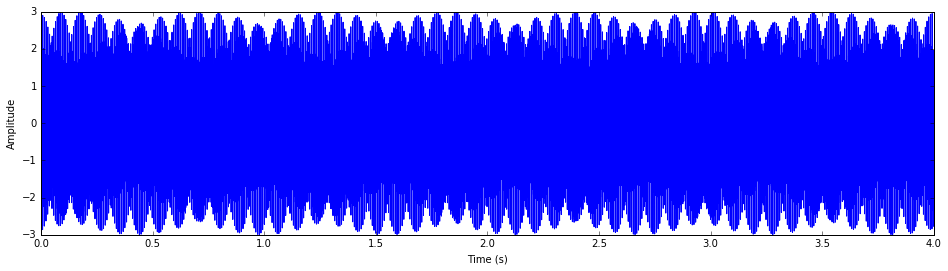

In [4]:
# Make, plot and play the C major triad here.
import matplotlib.pyplot as plt

c_freq = 523.25
e_freq = 659.26
g_freq = 783.99
t = 4.
sr = 44100.
signal = make_sinewave(c_freq, t, sr) + make_sinewave(e_freq, t, sr) + make_sinewave(g_freq, t, sr)

plot_audio(signal, sr)
Audio(signal, rate=sr)

#### 5. (one point) Implement a simple function to express the Root Mean Squared Amplitude of a signal encoded as an array, in dB, with respect to a reference value.

In [5]:
def rms_db(signal, reference):
    '''
    Parameters
    ----------
    signal:  np.ndarray 
        Array of floats containing the signal
    reference:  float
        A reference amplitude to compare to 

    Returns
    -------
    float
        a value in dB, given the reference value
    '''
    x_rms = np.sqrt(np.mean(signal ** 2))
    L = 20 * np.log10(x_rms / reference)
    return L

#### 6. (one point) Make a signal.  Vary its volume and find out for yourself how many dB different sounds have to be, before you can tell the volume is different?  Play identical pairs, where the only difference between them is the amplitude. Start with 0 db difference, and grow the difference until you can reliably tell them apart.   Oh...and do this in a quiet room with headphones on. This won't work at all on your laptop speakers or in a loud room.

I can tell apart them until the difference is larger than 2.92dB


In [6]:
#write your code to make repeated pairs of audio that vary by differing dB amounts here.
sr = 44100.
origin = make_sinewave(440.,1,sr) * 0.5
silence = make_sinewave(0.,0.5,sr)

signal = np.array([])
dBs = []


for scale in np.arange(1,3,0.2):
    amplied = origin * scale
    signal = np.append(signal, origin)
    signal = np.append(signal, silence)
    signal = np.append(signal, amplied)
    signal = np.append(signal, silence)
    signal = np.append(signal, silence)
    diff = rms_db(amplied, 1) - rms_db(origin, 1)
    dBs.append(diff)

print "dB difference: ", dBs
Audio(signal, rate =sr)


dB difference:  [0.0, 1.5836249209524951, 2.9225607135647582, 4.0823996531184941, 5.1054501020661194, 6.0205999132796215, 6.8484536164441225, 7.6042248342321184, 8.2994669594163586, 8.9431606268443815]


#### 7. (one point) Implement a Fourier transform function and an inverse Fourier transform function using the formulae from the course lecture notes.

In [7]:
def fourier_transform(x):
    """ 
    Performs a Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of real or complex values containing the signal
    
    Returns
    -------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    x = np.asarray(x, dtype = float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    X = np.dot(np.exp(-2j * np.pi * k * n/ N), x)
    return X

In [8]:
def inverse_fourier_transform(X):
    """ 
    Performs an inverse Fourier transform
    
    Parameters
    ----------
    x: np.ndarray 
        Array of  complex values containing the signal
    
    Return
    ------
    np.ndarray 
        Array of complex vaules containing the signal
    """
    
    N = X.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    x = np.dot(np.exp(2j * np.pi * k * n/ N), X) / N  
    return x

#### 8. (one point) Write code to test that these functions work properly. Be sure to explain why you think your test is a good one.

1. Apply a Fourier transform and then a inverse Fourier transform on a signal, check whether the input and the output are close enough, if so, it means that my implementations of Fourier transform and inverse Fourier transform are indeed invertible

2. Apply my implementation of Fourier transform and python's build-in fft function on a same signal, if the results are closed enough, it means that my implementation of Fourier transform works properly.

3. If 1 and 2 hold true, it also means that my implementation of inverse Fourier transform works properly.

4. If we apply Fourier transform on a signal with fixed frequency and plot it, its energy should only shows over a certain frequency.


Apply a Fourier transform and then a inverse Fourier transform, the input and the output are almost same:  True
My implementation of Fourier transform produces nearly same result as python's fft: True


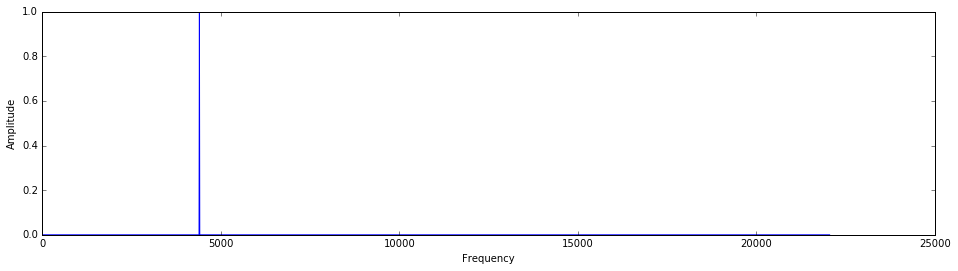

In [9]:
# Write your code to check here. 
#  Be sure to explain in your comments how this test confirms the correctness.
# NOTE: 2 things *I* would test are (1) if I take the Fourier transform of a signal, 
# and then take its output as the input to the inverse Fourier transform, does the 
# result look like the original signal?  and (2) If I look at the result of the 
# Fourier transform, do I see a pattern of energy that I would expect to see, given
# what the input signal contains?

sr = 44100.
t = 0.1
x = make_sinewave(4400, t, sr)
X = fourier_transform(x)

print "Apply a Fourier transform and then a inverse Fourier transform, the input and the output are almost same: ",np.allclose(inverse_fourier_transform(X), x)
print "My implementation of Fourier transform produces nearly same result as python's fft:", np.allclose(X, sp.fftpack.fft(x))

N = X.shape[0]
length = np.linspace(0., sr / 2, N/2)
plt.figure(figsize=(16,4))
plt.plot(length, 2.0/N * np.abs(X[:N/2]))
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()

From this point on, you will use the fft and ifft functions from scipy, as they are much faster than the code you just wrote. See the following link for documentation on them. 
http://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html


Hint: https://docs.python.org/2/library/timeit.html and https://docs.python.org/2/library/time.html  are useful for the following problem.
            

#### 9. (one point) What is the computational complexity of the Fourier Transform  code you built? What is the computational complexity of the Fast Fourier Transform (FFT)? Illustrate the difference in running time by measuring how long it takes your fourier_transform code on signals of different length and plot the time to completion (vertical axis) as a function of the number of samples (horizontal axis). Compare that on the same graph to how long it took on the same number of samples with the python FFT. Do these time numbers back up the computational complexity?

The computational complexity of my implementation is O(N^2).
The coumputational complextiyf of FFT, is O(N log N)
In the figure below, red line is the excutation time of my implementation, and the blue one is build-in FFT, obviously the former is much slower than the later.

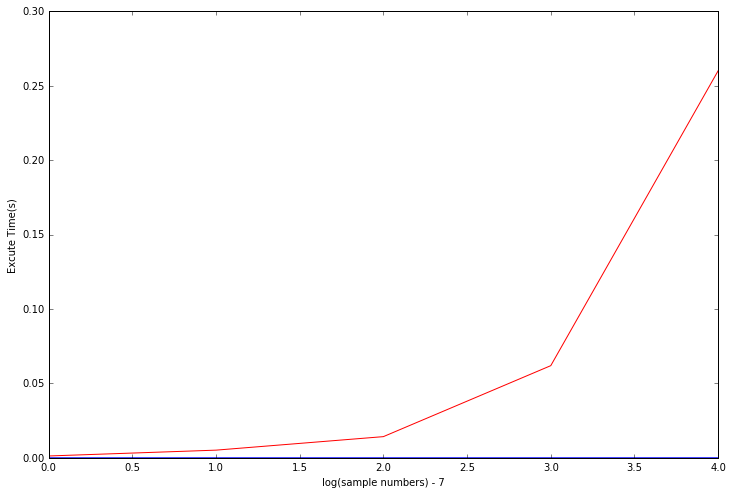

In [12]:
# Write your code to test the timing of the two approaches here.
import timeit
t1 = []
t2 = []
for i in [1,2,4,8,16]:
    sStr = 'from __main__ import fourier_transform; \
    import numpy as np;\
    import scipy as sp;\
    sample = {0}(128*{1})'.format('np.random.random', i)
    t1.append(timeit.timeit('fourier_transform(sample)', \
                            setup = sStr,\
                            number = 10) / 10)
    t2.append(timeit.timeit('sp.fftpack.fft(sample)', \
                            setup = sStr,
                            number = 10) / 10)

samples = np.arange(0., 5., 1.0)
plt.figure(figsize=(12,8))
plt.plot(samples, t1,'r', samples, t2, 'b')
plt.ylabel('Excute Time(s)')
plt.xlabel('log(sample numbers) - 7')
plt.show()
    

#### 10. (one point) The choice of windowing function for your FFT is an important one. Make a sound composed of 2 sine waves at 100 and 250 Hz. The sample rate should be 1000 Hz. Now, take a 64-sample window of the signal and take the FFT of it. Plot the log magnitude spectrum of your signal. Then,  apply a Hann window (from scipy.signal) to the audio before taking another FFT and plot that on the same axis. Compare the two plots. Be sure to label the frequency dimension correctly ( horizontal = frequency in Hz) with the correct units. Be sure to label your two lines so we can tell which is which.

#### Which approach do you think gives a more accurate visualization of the signal contents, the "unwindowed " (i.e. rectangular window) spectrum, or the one windowed with the Hann window?  What is the underlying reason it looks more accurate? 

According to the figure below, the one masked with Hann window looks much more accurate than the "unwindowed" one

The basic math of FT is based on the assumption that the time domain signal is periodic, so only when the measured signal is periodic and an integer number of periods fill the acquisition time interval, the FFT turns out fine. However, it is not always the case in practice, many times, the measured signal isn’t an integer number of periods.

When the number of periods in the acquisition is not an integer, the endpoints are discontinuous. These artificial discontinuities show up in the FFT as high-frequency components not present in the original signal. 

So, we apply a tapered window function like Hann window which smooths out any such discontinuity and thereby to make the spectrum more accurate

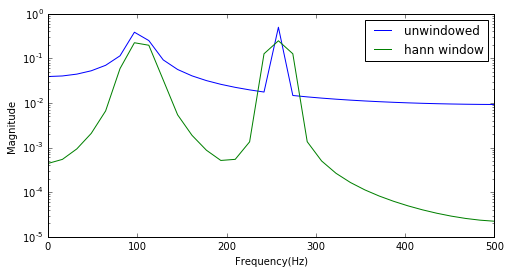

In [20]:
#Write your code for plotting the FFT of the harmonic sound here
sr = 1000.
freq1 = 100
freq2 = 250
t = 1.
w = 64
x = make_sinewave(freq1, t, sr) + make_sinewave(freq2, t, sr)
h = sp.signal.hann(w)
X_non = sp.fftpack.fft(x[:w]) / w
X_hann = sp.fftpack.fft(x[:w] * h) / w
freqs = np.linspace(0., sr/2, w/2)

plt.figure(figsize=(8,4))
plt.semilogy(freqs, np.abs(X_non[:w/2]), label=u"unwindowed")
plt.semilogy(freqs, np.abs(X_hann[:w/2]), label=u"hann window")
plt.legend()
plt.ylabel(u"Magnitude")
plt.xlabel(u"Frequency(Hz)")


#### 11. (one point)  Now, do everything exactly like you did in question 10....except increase the number of points in your FFT by taking  a 256 point FFT of this 64-point windowed sample (there is an optional parameter in scipy's fft that lets you specify how many points the FFT has). When you calculate a FFT with more points than are in the signal, zeros are added to the input signal and interpolation is performed on the output signal. In general, zero-padding in the time domain is equivalent to creating new analysis bins in between original bins in the frequency domain. This often gives us a more accurate view of the frequency content in the signal. What do you see that you didn't see before? 

You can read more about the effect of zero-padding on the frequency-domain representation in the follwing pages:

http://www.dsprelated.com/freebooks/sasp/Zero_Padding_Time_Domain.html

http://dspguru.com/dsp/howtos/how-to-interpolate-in-time-domain-by-zero-padding-in-frequency-domain



The sprectrum are not smooth than before. More subpeaks appear.

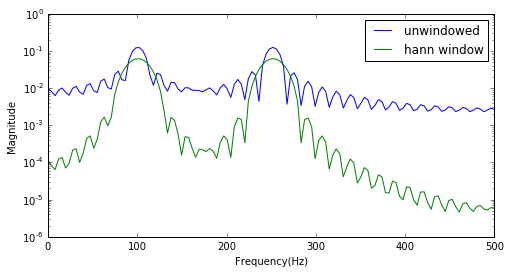

In [21]:
# write the code here
sr = 1000.
freq1 = 100
freq2 = 250
t = 1.
w = 64
fft_size = 256
x = make_sinewave(freq1, t, sr) + make_sinewave(freq2, t, sr)
h = sp.signal.hann(w)
X_non = sp.fftpack.fft(x[:w], fft_size) / fft_size
X_hann = sp.fftpack.fft(x[:w] * h, fft_size) / fft_size
freqs = np.linspace(0., sr/2, fft_size/2)

plt.figure(figsize=(8,4))
plt.semilogy(freqs, np.abs(X_non[:fft_size/2]), label=u"unwindowed")
plt.semilogy(freqs, np.abs(X_hann[:fft_size/2]), label=u"hann window")
plt.legend()
plt.ylabel(u"Magnitude")
plt.xlabel(u"Frequency(Hz)")

#### 12. (one point) What is the pitch (in Hz) of the lowest note played by a well-tuned piano using equal temperment tuned at A440? What is the pitch (in Hz) of the highest note? Now, given these numbers, assume you're recording at 44100 Hz (CD quality audio). Give a window length (in samples) so that the spacing between frequency bins (and therefore the frequency of the lowest component you can represent) is low enough to capture the lowest note on the piano. 

your answer goes here

#### 13. (one point) The case of the missing fundamental is where a sound seems to have a pitch at frequency F0, but has no energy at this frequency.  Instead all the frequency is at integer multiples of F0. Build an audio example that illustrates the case of the missing fundamental: First play a harmonic sound with 10 harmonics (including F0).  Let's make it the C one octave below Middle C on the piano: 131 Hz. Then, successively remove each harmonic, starting from the lowest, to the highest (F0, then F1....etc). How many harmonics had to disappear before it sounded like the pitch changed?

your answer goes here

In [ ]:
# your code to make the missing fundamental illustration goes here.


#### 14. (one point) Masking is where one sine wave makes a softer sine wave of nearby frequency inaudible. In class, you learned that our frequency sensitivity is related to the log of the frequency. This means that a lower tone will mask a broader frequency range above it than it does below it. We're going to explore that in this problem.  Make a sine wave at 1000 Hz.  Now, make a 2nd sine wave that is 30 dB softer and 50 Hz lower. Play them simultaneusly. Can you hear both? Now repeatedly lower the frequency of the softer sine wave by 50 Hz. At what frequency does it become really obvious that there are two sine waves?  Now try it the other direction.  Make the softer tone at 1050 Hz and vary it upward by 50 Hz each time. Now at what frequency does the softer tone become obvious? By the way....do this experiment with decent headphones in a quiet room. Don't use your laptop speakers in a noisy place.

your answer goes here


In [ ]:
# your code to illustrate masking goes here


#### 15. (one point) Explain, in your own words, what the cochlea does and how it does it.

your answer goes here 